#### Trabajo semanal 11- Síntesis de func. transferencia descargadas NO disipativas

1) Ej. 6 TP Síntesis de Cuadripolos) 

Sintetizar un cuadripolo que cumpla con los siguientes parámetros:

$$Y_{11}=\frac{I1}{V1}\bigg|_{V2=0}=\frac{3s.(s^2+7/3)}{(s^2+2)(s^2+5)}$$

$$Y_{21}=\frac{I2}{V1}\bigg|_{V2=0}=\frac{s.(s^2+1)}{(s^2+2)(s^2+5)}$$


a) Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.
b) Calcular el valor de los componentes, es decir la síntesis analítica.
c) Verificar los parámetros en el cuadripolo sintetizado.

2) Sintetizar un cuadripolo que implemente la siguiente transferencia de tensiones en vacío:

$$\frac{V2}{V1}\bigg|_{I2=0}=\frac{(s^2+2)(s^2+9)}{(s^2+1)(s^2+3)}$$


a) Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.
b) Calcular el valor de los componentes, es decir la síntesis analítica.
c) Verificar los parámetros en el cuadripolo sintetizado.

In [385]:
import sympy as sp
from schemdraw import Drawing
import numpy as np

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw, remover_polo_infinito
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

# Resolución simbólica
s = sp.symbols('s', complex=True)

def custom_remover_polo_jw(imit, omega_cuadrado):

    kk = sp.simplify(sp.expand(imit*(s**2+omega_cuadrado)/s)).subs(s**2, -omega_cuadrado)

    C = kk/omega_cuadrado
    L = 1/kk

    imit_r = sp.factor(sp.simplify(sp.expand(imit - kk*s/(s**2 + omega_cuadrado))))

    return ( [imit_r, kk, L, C] ) 


### Ej1)

In [386]:
# Sea la siguiente función de excitación
YY = 3*s*(s**2 + sp.Rational(7,3))/((s**2 + 2)*(s**2 + 5))

print_latex(a_equal_b_latex_s('Z(s)', YY))

<IPython.core.display.Math object>

In [387]:
Z, k0 = remover_polo_dc(1/YY, omega_zero=1)

print_latex(a_equal_b_latex_s('Zt_1(s)', k0))
print_latex(a_equal_b_latex_s('Z_1(s)', Z))

C1 = k0.subs(s, 1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [388]:
Y, kk, L2, C2 = remover_polo_jw(1/Z, isImpedance=False, omega=1)

print_latex(a_equal_b_latex_s('L', L2))
print_latex(a_equal_b_latex_s('C', C2))
print_latex(a_equal_b_latex_s('Y_1(s)', Y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [389]:
Y, kk, L3, C3 = custom_remover_polo_jw(Y, 3)

print_latex(a_equal_b_latex_s('L', L3))
print_latex(a_equal_b_latex_s('C', C3))
print_latex(a_equal_b_latex_s('Y_1(s)', Y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

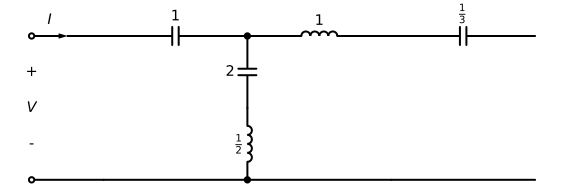

In [390]:
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_elemento_serie(d, 'C', C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_elemento_serie(d, 'L', L3)

d = dibujar_elemento_serie(d, 'C', C3)

display(d)

## Verificacion

In [391]:
ZA = 1/(s*C1)

ZB = 1/(s*C2) + s*L2

ZC = 1/(s*C3) + s*L3

Z = sp.Matrix([[ZA + ZB, ZB], [ZB, ZB + ZC]])
det = Z.det()

print_latex(a_equal_b_latex_s('Y_{11}(s)', sp.factor(sp.simplify(sp.factor(sp.simplify(Z[1,1]/det))))))
print_latex(a_equal_b_latex_s('Y_{21}(s)', sp.factor(sp.simplify(sp.factor(sp.simplify(Z[1,0]/det))))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Ej2)

In [392]:
# Sea la siguiente función de excitación
ZZ = (s**2 + 1)*(s**2 + 3)/((s**2 + sp.Rational(3/2))*s)

print_latex(a_equal_b_latex_s('Z(s)', ZZ))

<IPython.core.display.Math object>

In [393]:
Z1, Zt1 = remover_polo_infinito (ZZ ,omega_zero= 3, isSigma=False )
print_latex(a_equal_b_latex_s('Zt_1(s)', Zt1))
print_latex(a_equal_b_latex_s('Z_1(s)', Z1))

L1 = Zt1.subs(s, 1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [394]:
Y1, kk, L2, C2 = remover_polo_jw(1/Z1, isImpedance=False, omega=3)
print_latex(a_equal_b_latex_s('L', L2))
print_latex(a_equal_b_latex_s('C', C2))
print_latex(a_equal_b_latex_s('Y_1(s)', Y1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [395]:
Z1 = 1/Y1

k_inf = sp.simplify(sp.expand(Z1/s)).subs(s**2, -2) * s

Z1 = sp.factor(sp.simplify(sp.expand(Z1 - k_inf)))

print_latex(a_equal_b_latex_s('Zt_1(s)', k_inf))
print_latex(a_equal_b_latex_s('Z_1(s)', Z1))

L3 = k_inf.subs(s, 1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [396]:
Y1, kk, L4, C4 = custom_remover_polo_jw(1/Z1, 2)

print_latex(a_equal_b_latex_s('L', L4))
print_latex(a_equal_b_latex_s('C', C4))
print_latex(a_equal_b_latex_s('Y_1(s)', Y1))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

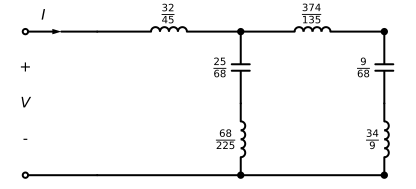

In [397]:
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_elemento_serie(d, 'L', L1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_elemento_serie(d, 'L', L3)

d = dibujar_tanque_derivacion(d, L4, C4)

display(d)

## Verificacion

In [399]:
Z1 = s*L1
Y1 = 1/(1/(s*C2)+s*L2)

Z2 = s*L3
Y2 = 1/(1/(s*C4)+s*L4)

T1 = sp.Matrix([[1+Z1*Y1, Z1],[Y1, 1]])
T2 = sp.Matrix([[1+Z2*Y2, Z2],[Y2, 1]])

T = T1 * T2

print_latex(a_equal_b_latex_s('\\frac{V_2}{V_1}(s)', sp.factor(sp.simplify((T[0,0]**(-1))))))
print_latex(a_equal_b_latex_s('Z_{11}(s)', sp.factor(sp.simplify((T[0,0]/T[1,0])))))
print_latex(a_equal_b_latex_s('Z_{21}(s)', sp.factor(sp.simplify((1/T[1,0])))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>